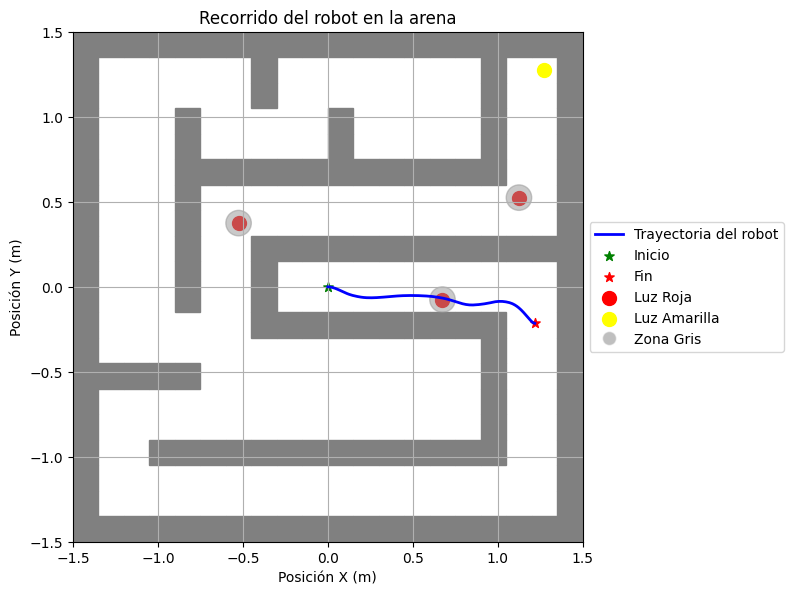

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

datos = """


"""


# Matriz de la arena
arena_map = [
"%%%%%%%%%%%%%%%%%%%%",
"%##################%",
"%##################%",
"%##%%%%%%%%%%%%%%##%",
"%###############%##%",
"%###############%##%",
"%%%%%###########%##%",
"%###############%##%",
"%######%%%%%%%%%%##%",
"%###%##%###########%",
"%###%##%###########%",
"%###%##%%%%%%%%%%%%%",
"%###%##############%",
"%###%##############%",
"%###%%%%%%%%%%%%%##%",
"%###%#####%#####%##%",
"%###%#####%#####%##%",
"%######%########%##%",
"%######%########%##%",
"%%%%%%%%%%%%%%%%%%%%"

]

# Conversión de mapa a coordenadas reales (de -1.5 a 1.5)
cell_size = 3.0 / 20.0  # Cada celda mide 0.15 metros
half_arena = 1.5

# Nueva función para dibujar muros individualmente como parches rectangulares
def draw_walls(ax, arena_map, cell_size, half_arena):
    for row_idx, row in enumerate(reversed(arena_map)):  # Invertir verticalmente
        for col_idx, char in enumerate(row):
            if char == '%':
                x = -half_arena + col_idx * cell_size
                y = half_arena - row_idx * cell_size
                wall = plt.Rectangle((x, y - cell_size), cell_size, cell_size, color='gray')
                ax.add_patch(wall)

# Parsear posiciones del robot
robot_x = []
robot_y = []

for linea in datos.strip().split('\n'):
    partes = linea.strip().split()
    if len(partes) == 2:
        x, y = map(float, partes)
        robot_x.append(x)
        robot_y.append(y)

# Datos de luces y áreas
light_positions = [(1.275, 1.275)]  # Luz normal
red_light_positions = [
    (0.675, -0.075), (1.125, 0.525), (-0.525, 0.375)
]  # Luces rojas

ground_areas = [
    (0.675, -0.075, 0.075, 0.5), (1.125, 0.525, 0.075, 0.5),
    (-0.525, 0.375, 0.075, 0.5)
]  # Áreas de tierra (zonas grises)

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Trayectoria del robot
ax.plot(robot_x, robot_y, color='blue', linewidth=2, label='Trayectoria del robot')
ax.scatter(robot_x[0], robot_y[0], color='green', s=50, label='Inicio', marker='*')
ax.scatter(robot_x[-1], robot_y[-1], color='red', s=50, label='Fin', marker='*')

# Dibujar muros
draw_walls(ax, arena_map, cell_size, half_arena)

# Dibujar luces rojas
for x, y in red_light_positions:
    ax.scatter(x, y, color='red', s=100, label='Luz Roja')

# Dibujar luz amarilla / zona negra
for x, y in light_positions:
    ax.scatter(x, y, color='yellow', s=100, label='Luz Amarilla')

# Dibujar áreas de tierra (zona gris)
for x, y, radius, color in ground_areas:
    circle = plt.Circle((x, y), radius, color=plt.cm.Greys(color), alpha=0.5)
    ax.add_patch(circle)


# Formato
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.set_xlabel("Posición X (m)")
ax.set_ylabel("Posición Y (m)")
ax.set_title("Recorrido del robot en la arena")
ax.grid(True)

# Crear elemento de leyenda para zona gris como círculo
zona_gris_circle = Line2D([0], [0], marker='o', color='w', label='Zona Gris',
                          markerfacecolor='gray', alpha=0.5, markersize=10)

# Eliminar etiquetas duplicadas y añadir zona gris
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
unique['Zona Gris'] = zona_gris_circle

# Mostrar leyenda
ax.legend(unique.values(), unique.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.tight_layout()
plt.show()